In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot 
jtplot.style(theme='monokai', context='notebook', ticks= True, grid=False)

In [2]:
tweets_df=pd.read_csv('twitter.csv')
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [5]:
tweets_df=tweets_df.drop(['id'], axis=1)
    #axis =0 mans regering to a row
    #axis =1 means refering to a column
    

In [6]:
tweets_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

<Axes: >

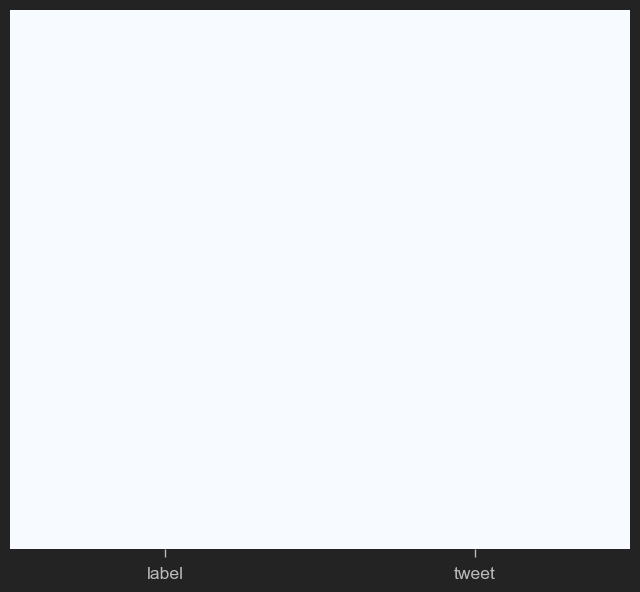

In [7]:
#data exploration
sns.heatmap(tweets_df.isnull(), yticklabels= False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'label'}>]], dtype=object)

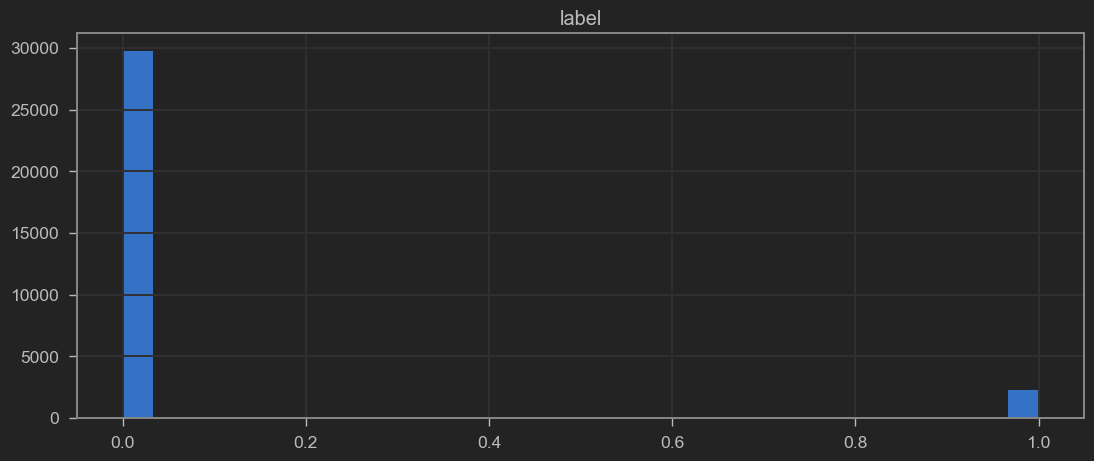

In [8]:

tweets_df.hist(bins= 30, figsize=(13,5))

In [9]:
tweets_df['length'] =tweets_df['tweet'].apply(len)

In [10]:
tweets_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [11]:
tweets_df[tweets_df['length']== 11]

label        tweet  length
25195      0  i love you       11

<Axes: ylabel='Frequency'>

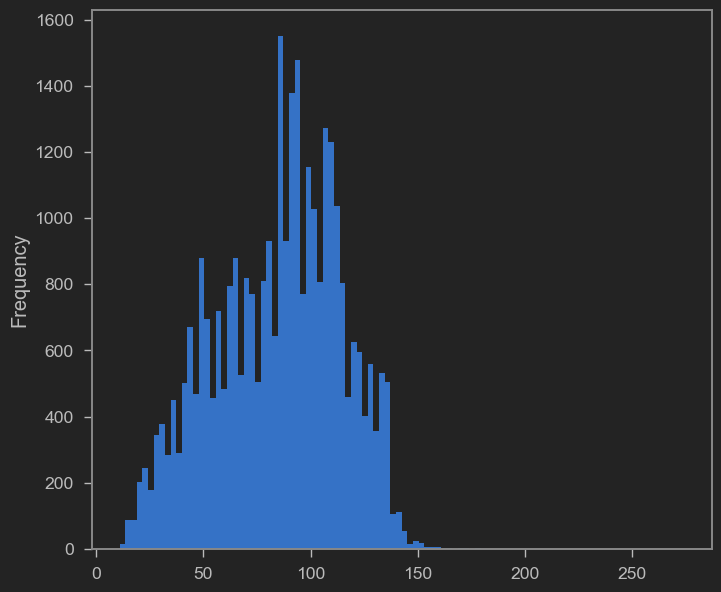

In [12]:
tweets_df['length'].plot(bins= 100, kind='hist')

In [13]:
positive= tweets_df[tweets_df['label']==0]

In [14]:
#

In [15]:
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [16]:
negative= tweets_df[tweets_df['label']==1]
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [17]:
sentences= tweets_df["tweet"]
len(sentences)
#This code snippet retrieves the 'tweet' column from a DataFrame called tweets_df and converts it into a list of sentences. The len() function is then used to calculate the number of sentences in the list.

31962

In [18]:
sentences

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [20]:
sentence_as_one=" ".join(sentences)

sentence_as_one

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [21]:
from wordcloud import WordCloud

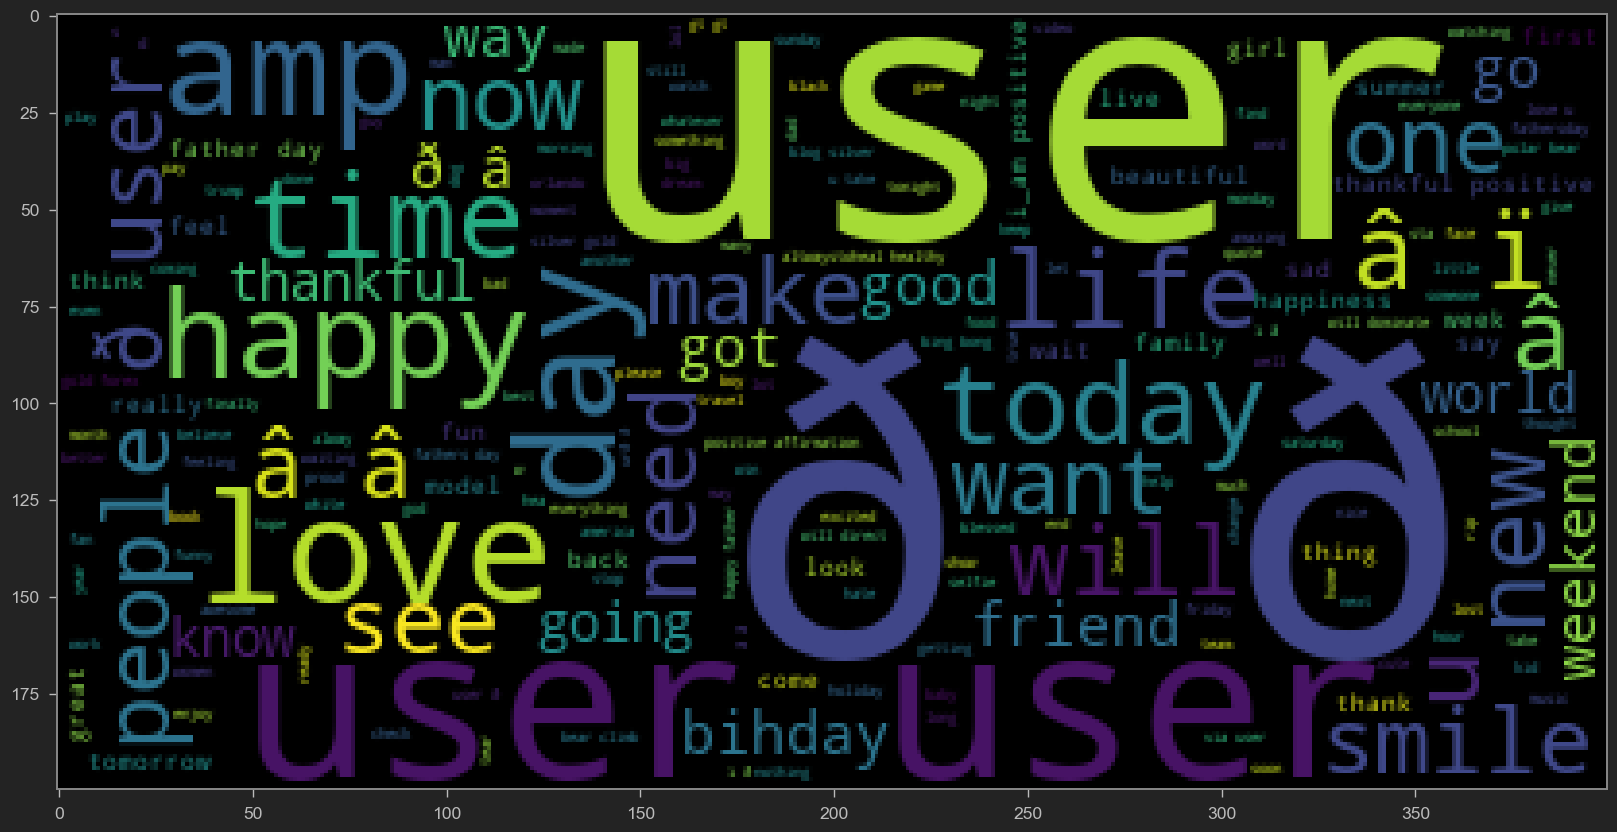

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence_as_one))

In [23]:
# use of wordcloud 
#u have a large data and you want to know that what your users are talking about
#on day to day basis for that we can use wordcloud

In [24]:
pos= positive['tweet'].tolist()
#abhi ye list ke form mai hai
#niche string ke form mai ho jaegi
pos
#pos_one_string=" ".join(pos)
#plt.figure(figsize=(20,20))
#.imshow(WordCloud().generate(pos_one_string))

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [25]:
pos_one_string=" ".join(pos)
pos_one_string
#plt.figure(figsize=(20,20))
#.imshow(WordCloud().generate(pos_one_string))

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

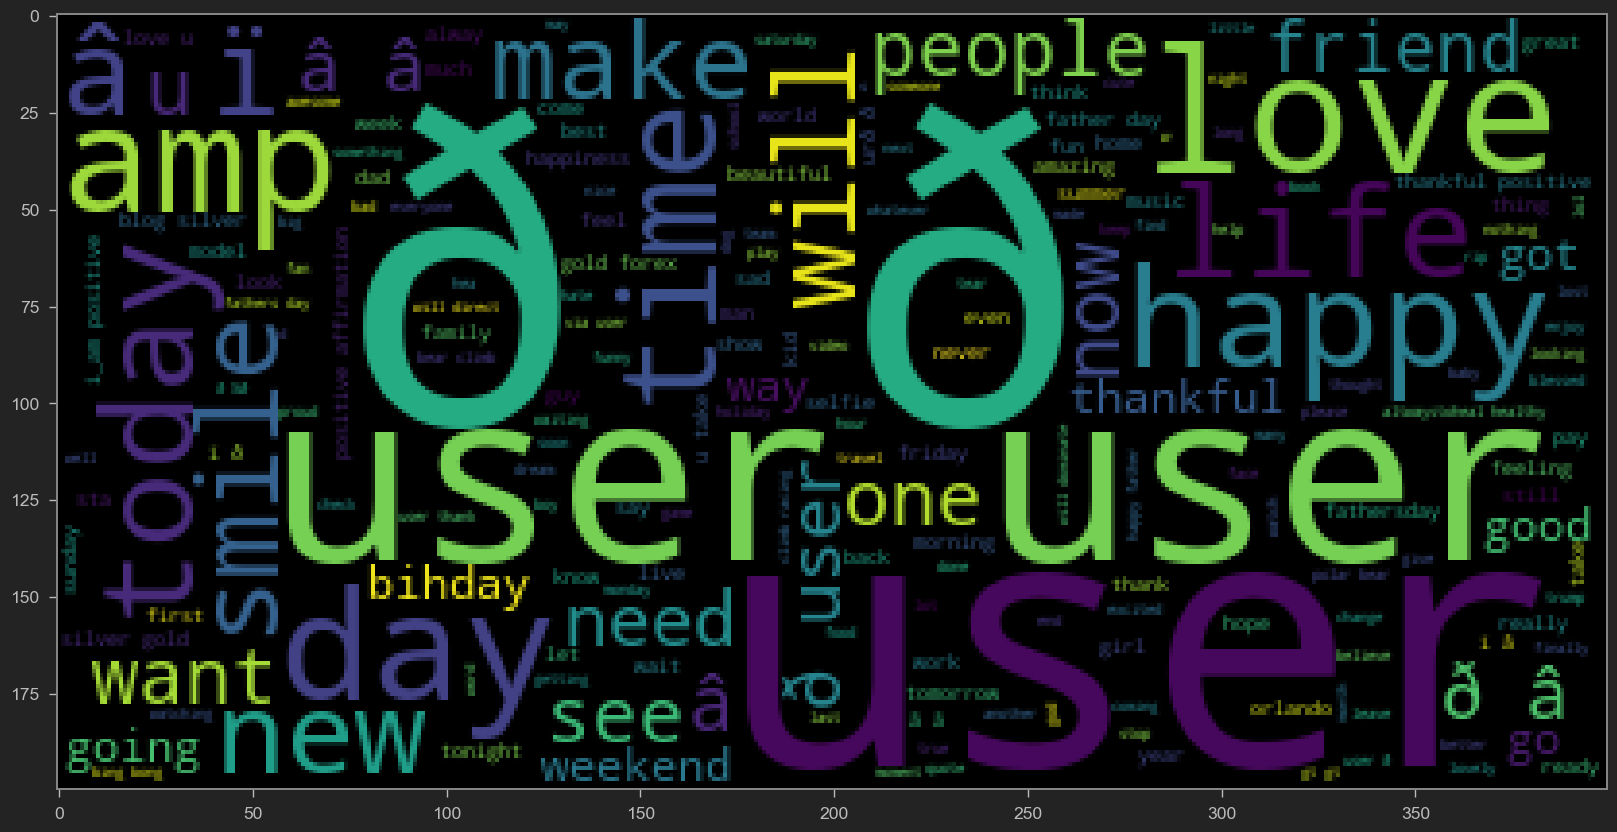

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_one_string))

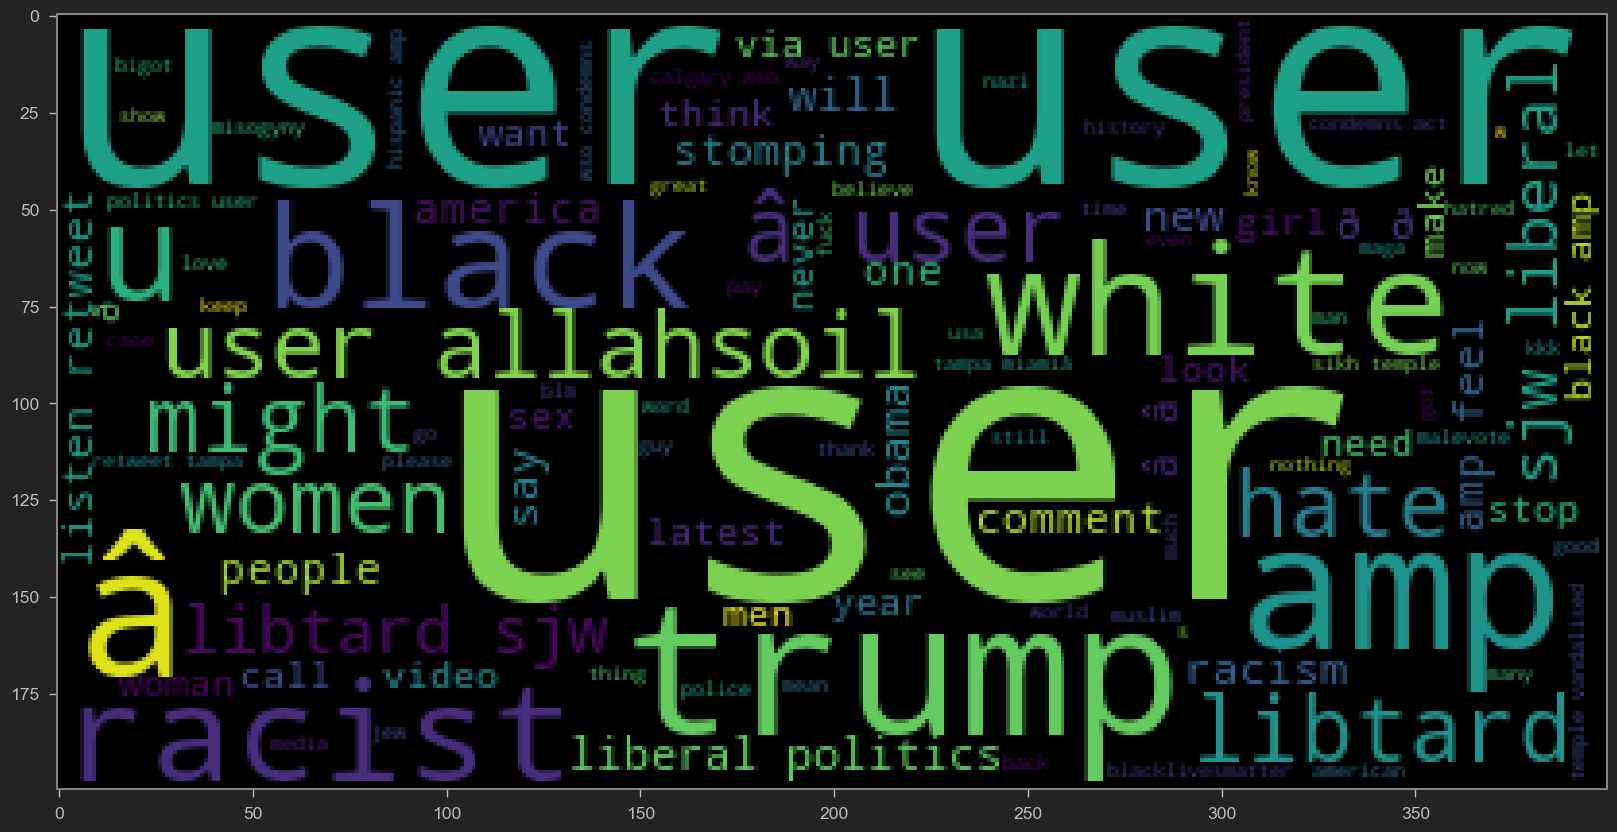

In [27]:
neg= negative['tweet'].tolist()
neg_one_string=" ".join(neg)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_one_string))

In [28]:
#data cleaning
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
#pract
sentence=" today<=> is a good day"
sentence_part= [ char for char in sentence if char not in string.punctuation]
sentence_part= ''.join(sentence_part)
sentence_part

' today is a good day'

In [32]:
cleaned_part= [char for char in sentence_as_one if char not in string.punctuation]
cleaned_part=''.join(cleaned_part)
cleaned_part

' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked   bihday your majesty model   i love u take with u all the time in urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide society now    motivation 22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo    user camping tomorrow user user user user user user user dannyâ\x80¦ the next school year is the year for examsð\x9f\x98¯ cant think about that ð\x9f\x98\xad school exams   hate imagine actorslife revolutionschool girl we won love the land allin cavs champions cleveland clevelandcavaliers  â\x80¦   user user welcome here   im   its so gr8    â\x86\x9d ireland consumer price index mom climbed from previous 02 to 05 in may   blog silver gold forex we are so selfish o

In [33]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [34]:
def message_cleaning(message):
    test_pun=[char for char in message if char not in string.punctuation]
    test_pun=''.join(test_pun)
    test_pun_clean=[word for word in test_pun.split() if word.lower() not in stopwords.words('english')]
    return test_pun_clean

In [35]:
tweets_df_clean= tweets_df['tweet'].apply(message_cleaning)

In [37]:
#print(tweets_df_clean[5])
tweets_df_clean

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer = message_cleaning, dtype= np.uint8)
#dtype is 8 bit format as the actual size of the array is not that huge, so will run into error if you dont specify the data type as 
#it will say not enough memory
tweets_countvectorizer= vectorizer.fit_transform(tweets_df['tweet'])

In [39]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
tweets_countvectorizer.shape

(31962, 47386)

In [41]:
X=pd.DataFrame(tweets_countvectorizer.toarray())

In [42]:
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [43]:
y=tweets_df['label']

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5943
           1       0.61      0.56      0.58       450

    accuracy                           0.94      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.94      0.94      6393



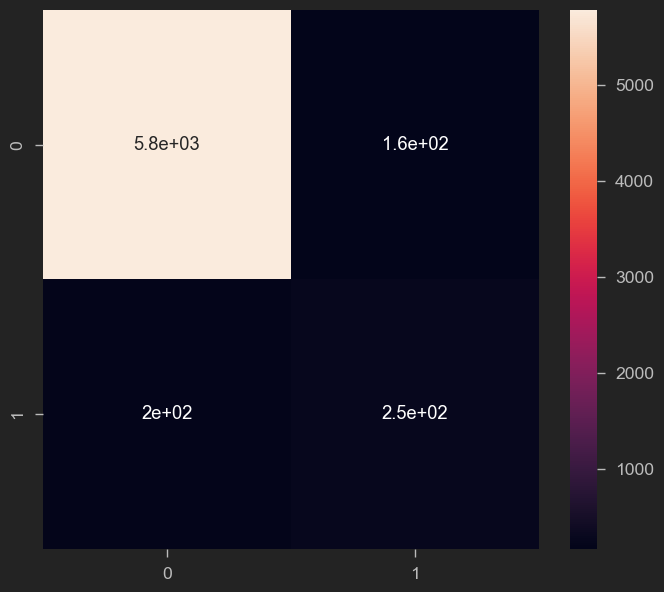

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)
y_predict_test = NB_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_test))

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [46]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier= MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

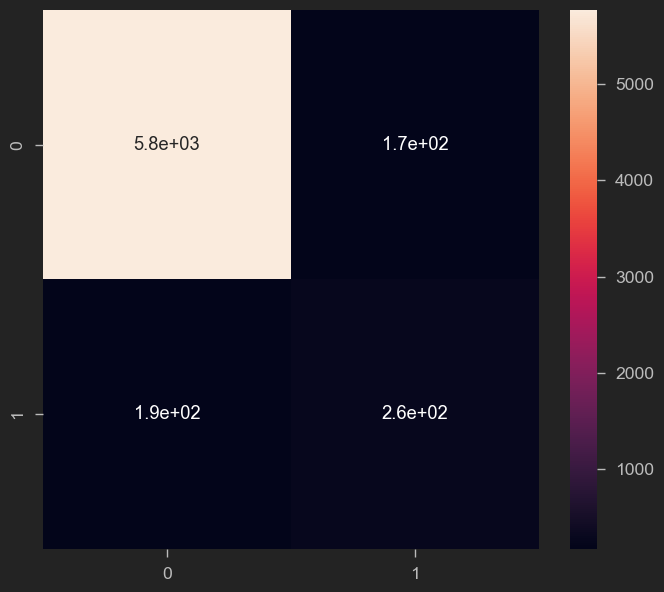

In [48]:
y_predict_test= NB_classifier.predict(x_test)
cm=confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [49]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5940
           1       0.60      0.58      0.59       453

    accuracy                           0.94      6393
   macro avg       0.78      0.77      0.78      6393
weighted avg       0.94      0.94      0.94      6393

